In [29]:
import codecs,math,pickle,socket
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [30]:
if "macbookair" in socket.gethostname().lower():
    nomRepertoire="/Users/gilles/Documents/TEMP/"
else:
    nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomRepertoire

'/Users/gilles/Documents/TEMP/'

In [31]:
%matplotlib inline

In [32]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("talk")
sns.set_palette("husl")

In [33]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
nomLexiqueOrg="/Users/gilles/Dropbox/Travail/Recherche/BoKu/LingInfo/Lexique3/Lexique381/Lexique381.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t",encoding="utf8")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [34]:
Lexique3.columns#, vlexique.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [35]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]]

- extraction des verbes de Lexique3 => *verb3*

In [36]:
lex3.loc[:,"7_freqlemfilms2"]=lex3.loc[:,"7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3.loc[:,"8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3.loc[:,"9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3.loc[:,"10_freqlivres"].astype(float)

In [37]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

In [38]:
verb3=lex3[lex3["4_cgram"]=="VER"]

- élimination des infover mal formés
 - liste des 412 problèmes
 - remplacement des infover problématiques par un tag cohérent

In [39]:
verb3[(verb3["lex3_11_infover"].str.split(";").apply(set).str.len()!=verb3["lex3_11_infover"].str.split(";").str.len())]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
481,abriter,abRite,abriter,VER,NaN,NaN,7.92,26.22,2.37,6.96,inf;;inf;;inf;;
659,absous,apsu,absoudre,VER,m,NaN,2.66,3.72,1.15,1.08,imp:pre:2s;ind:pre:1s;par:pas;par:pas;par:pas;
1094,accompagner,ak§paNe,accompagner,VER,NaN,NaN,90.56,124.46,24.87,22.23,inf;;
1729,acheté,aS°te,acheter,VER,m,s,290.70,148.38,72.38,28.72,par:pas;par:pas;par:pas;
1864,acquis,aki,acquérir,VER,m,NaN,8.30,29.66,3.52,13.65,ind:pas:1s;par:pas;par:pas;
2328,admirer,admiRe,admirer,VER,NaN,NaN,32.39,68.18,6.50,17.64,inf;;
2346,admis,admi,admettre,VER,m,NaN,50.05,59.46,6.74,11.35,ind:pas:1s;par:pas;par:pas;
2871,afficher,afiSe,afficher,VER,NaN,NaN,8.35,19.26,2.06,3.78,inf;;
2970,affirmé,afiRme,affirmer,VER,m,s,15.61,63.51,1.66,4.59,imp:pre:2s;par:pas;par:pas;
3040,affoler,afole,affoler,VER,NaN,NaN,5.92,20.54,1.00,2.50,inf;;


### Supprimer les tags incorrects
- imp:pre:3s n'existe pas en français

In [40]:
verb3.loc[:,"lex3_11_infover"]=verb3.loc[:,"lex3_11_infover"].str.replace("imp:pre:3s;","")

In [41]:
verb3[verb3["lex3_11_infover"].str.contains("imp:pre:3s")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover


### réparer les infover
1. effacer les ; finaux
1. couper sur les ;
1. éliminer les doublons
1. trier la liste
1. assembler la liste et ajouter un ; final
1. créer la colonne 11_infover corrigée

In [42]:
verb3.loc[:,"11_infover"]=verb3.loc[:,"lex3_11_infover"].str.strip(";").str.split(";").apply(set).apply(list).apply(sorted).str.join(";").str.strip(";")+";"

In [43]:
verb3

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,ind:pre:3s;,ind:pre:3s;
18,abaissa,abEsa,abaisser,VER,NaN,NaN,4.93,18.04,0.00,2.64,ind:pas:3s;,ind:pas:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.10,0.07,ind:pas:1s;,ind:pas:1s;
20,abaissaient,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.00,0.41,ind:imp:3p;,ind:imp:3p;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.02,2.50,ind:imp:3s;,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,4.93,18.04,0.01,2.50,par:pre;,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,4.93,18.04,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,4.93,18.04,0.05,0.95,ind:pre:3p;,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,4.93,18.04,1.09,2.91,inf;,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,4.93,18.04,0.19,0.07,ind:fut:3s;,ind:fut:3s;


In [44]:
verb3[verb3["3_lemme"]=="aimer"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
3967,aima,Ema,aimer,VER,NaN,NaN,1655.07,795.61,0.41,1.69,ind:pas:3s;,ind:pas:3s;
3971,aimai,EmE,aimer,VER,NaN,NaN,1655.07,795.61,0.20,0.81,ind:pas:1s;,ind:pas:1s;
3972,aimaient,EmE,aimer,VER,NaN,NaN,1655.07,795.61,6.20,16.42,ind:imp:3p;,ind:imp:3p;
3973,aimais,EmE,aimer,VER,NaN,NaN,1655.07,795.61,58.07,57.16,ind:imp:1s;ind:imp:2s;,ind:imp:1s;ind:imp:2s;
3974,aimait,EmE,aimer,VER,NaN,NaN,1655.07,795.61,49.57,128.72,ind:imp:3s;,ind:imp:3s;
3977,aimant,Em@,aimer,VER,NaN,NaN,1655.07,795.61,2.60,3.92,par:pre;,par:pre;
3991,aimasse,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.02,0.00,sub:imp:1s;,sub:imp:1s;
3992,aimassent,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.20,sub:imp:3p;,sub:imp:3p;
3993,aimassions,Emasj§,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.07,sub:imp:1p;,sub:imp:1p;
3994,aime,Em,aimer,VER,NaN,NaN,1655.07,795.61,751.29,257.57,imp:pre:2s;ind:pre:1s;ind:pre:1s;ind:pre:3s;su...,imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:1s;su...


In [45]:
verb3.groupby("11_infover")[["11_infover"]].count()

,11_infover
11_infover,
cnd:pre:1p;,242
cnd:pre:1s;,388
cnd:pre:1s;cnd:pre:2s;,567
cnd:pre:2p;,351
cnd:pre:2s;,54
cnd:pre:3p;,931
cnd:pre:3s;,1683
imp:pre:1p;,233
imp:pre:1p;ind:imp:1p;ind:pre:1p;,1


# Calculs pour Caveats with Entropy

## Préparations des données
- flemme regroupe toutes les cases d'un même lemme

In [46]:
flemme=verb3.groupby(by="3_lemme")[["11_infover"]].sum()

- calcul du nombre de cases par lemme

In [47]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [48]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


- ajout du genre et du nombre sur les cases du participe passé

In [58]:
def infoVer(row):
    genre=""
    nombre=""
    if isinstance(row["11_infover"],str) and "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str):
            genre=[row["5_genre"]]
        else:
            genre=["m","f"]
        if isinstance(row["6_nombre"],str):
            nombre=[row["6_nombre"]]
        else:
            nombre=["s","p"]
        participes=";".join(["par:pas:"+g+n for g in genre for n in nombre])
        return row["11_infover"].replace("par:pas",participes)
    elif isinstance(row["11_infover"],str) and not "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str) or isinstance(row["6_nombre"],str):
            print "PB avec %s, genre ou nombre sans participe passé"%row["1_ortho"]
        return row["11_infover"]
    else:
        return row["11_infover"]

In [59]:
verb3.loc[:,"infover"]=verb3.apply(lambda x: infoVer(x),axis=1)

In [60]:
verb3[(verb3["11_infover"].str.contains("par:pas")) & (verb3["3_lemme"]=="mettre")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover,infover
82937,mis,mi,mettre,VER,m,NaN,1004.83,1083.72,228.57,245.68,ind:pas:1s;ind:pas:2s;par:pas;par:pas;par:pas;...,ind:pas:1s;ind:pas:2s;par:pas;,ind:pas:1s;ind:pas:2s;par:pas;
82953,mise,miz,mettre,VER,f,s,1004.83,1083.72,35.33,46.69,par:pas;,par:pas;,par:pas;
82965,mises,miz,mettre,VER,f,p,1004.83,1083.72,5.36,9.05,par:pas;,par:pas;,par:pas;


In [52]:
nomRepertoire

'/Users/gilles/Documents/TEMP/'

In [53]:
colVerbLex3=['1_ortho','2_phon','3_lemme','4_cgram','5_genre','6_nombre','7_freqlemfilms2','8_freqlemlivres','9_freqfilms2','10_freqlivres','infover']
verbLex3=verb3[colVerbLex3].copy()
verbLex3.rename(columns={'infover':'11_infover'}, inplace=True)
verbLex3.to_csv(nomRepertoire+"Verbes3.csv",sep="\t",encoding="utf8",index=False)

- ajout d'une colonne pour le nombre de cases de chaque lemme

In [54]:
flemme=verb3.groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [61]:
flemme.sort_values("nbSet")[:100]

,infover,nbSet
3_lemme,,
scolariser,inf;,1
gringuer,inf;,1
grisailler,ind:pas:3p;,1
chatonner,ind:pre:3s;,1
griveler,ind:pre:3s;,1
charruer,par:pas;,1
charronner,par:pas;,1
grouiner,inf;,1
grinchir,inf;,1


- calcul du nombre de lemmes avec exactement une seule forme réparti par nom de case

In [78]:
isolatedForms=flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

In [79]:
isolatedForms

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2
imp:pre:1p;,3


In [62]:
set(i.rsplit(":",1)[0] for i in isolatedForms.index.tolist())

{u'imp:pre',
 u'ind:fut',
 u'ind:imp',
 u'ind:pas',
 u'ind:pre',
 u'inf;',
 u'inf;inf;',
 u'par',
 u'par:pas;par',
 u'par:pas;par:pas;par',
 u'par:pas;par:pas;par:pas;par',
 u'sub:imp',
 u'sub:pre'}

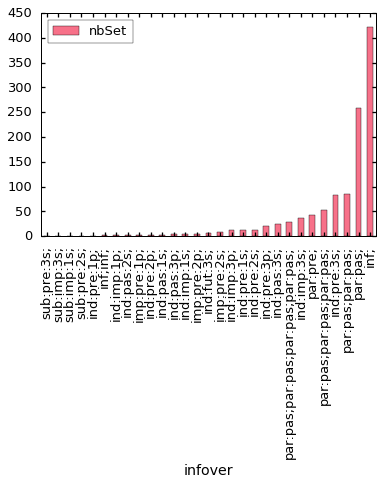

In [63]:
isolatedForms.plot(kind='bar')

## Quelle influence pour le imparfait 4/5 et le subjonctif 4/5
- combien des lexèmes ont exactement une seule forme dans Lex3 qui appartient à cette zone
 - 2 : sélecter et impulser
 - tous les deux des confusions probables avec les noms pluriels : sélections et impulsions
  - leur fréquence est 0 pour livres et le minimum 0.01 pour films

In [64]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [66]:
lex3[lex3["1_ortho"].isin([u"sélections","impulsions"])]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
69193,impulsions,5pylsj§,impulser,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;
69194,impulsions,5pylsj§,impulsion,NOM,f,p,4.58,8.38,1.58,2.36,NaN
126414,sélections,selEksj§,sélection,NOM,f,p,4.69,2.64,0.24,0.27,NaN
126415,sélections,selEktj§,sélecter,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;


## Verbes sans formes fondamentales
- Combien de verbes n'ont aucune des formes fondamentales (infinitif, participe passé/présent, indicatif présent) ?
 - 135
- Combien de formes ont-ils ?
 - 1 forme : 114
 - 2 formes : 20
 - 3 formes :1

In [67]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


In [68]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,infover
nbSet,
1,114
2,20
3,1


In [77]:
flemme[(flemme["nbSet"]==1) & (flemme["infover"].str.contains("(ind:pas|sub:imp)"))].groupby(by="infover").count().sort_values("nbSet")

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,nbSet
infover,
sub:imp:1s;,1
sub:imp:3s;,1
ind:pas:2s;,2
ind:pas:1s;,3
ind:pas:3p;,4
ind:pas:3s;,25


In [76]:
flemme[(flemme["infover"].str.contains("(ind:pas|sub:imp)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,infover
nbSet,
1,36
2,49
3,64
4,63
5,72
6,86
7,100
8,110
9,152


In [69]:
%matplotlib inline

In [70]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

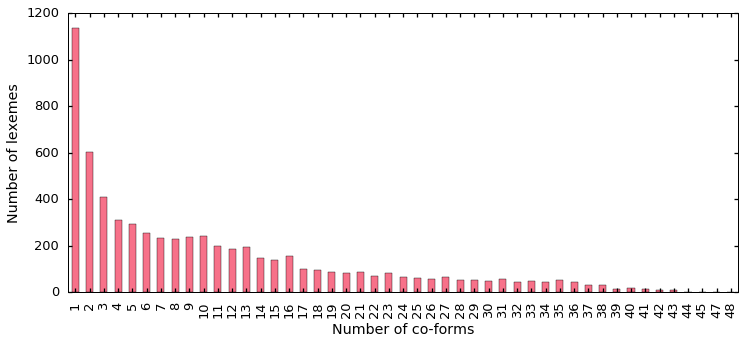

In [71]:
ax=flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,5))
ax.set_xlabel("Number of co-forms")#,fontsize=16)
ax.set_ylabel("Number of lexemes")#,fontsize=16)
#ax.set_yscale("log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
plt.minorticks_off()
plt.savefig("Lex3-nbLexemesPerNbCoforms.png",dpi=300, bbox_inches="tight")

In [ ]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

In [ ]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

In [ ]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- converger vers la distribution de fréquences pour les syncrétismes
 - calculer la distribution moyenne
 - diviser la fréquence des syncrétismes en fonction de la moyenne
- tracer la courbe de fréquence pour les verbes

### Pour les films

In [ ]:
lemmeFilm3=verb3[(verb3["7_freqlemfilms2"]!=0)][["3_lemme","1_ortho","7_freqlemfilms2"]]
lemmeFilm3.columns=["lemme","ortho","freq"]

In [ ]:
lemmeFilm3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [ ]:
film3=verb3[(verb3["9_freqfilms2"]!=0)][["3_lemme","1_ortho","9_freqfilms2","infover"]]
film3.columns=["lemme","ortho","freq","cases"]

In [ ]:
freqTableFilms=pd.pivot_table(film3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [ ]:
freqTableFilms.set_index("lemme")

In [ ]:
cellOrder=[c for c in freqTableFilms.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableFilms.columns[1:] if ";" in c[:-1]]
cellOrder

In [ ]:
freqTableFilms=freqTableFilms.reindex_axis(["lemme"]+cellOrder, axis=1)

In [ ]:
freqTableFilms.columns=[c.strip(";") for c in freqTableFilms.columns]

In [ ]:
simplesCases=freqTableFilms.sum()[1:52]
multiplesCases=freqTableFilms.sum()[52:]
refFreq=simplesCases.copy()


In [ ]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqFilms=refFreq

In [ ]:
refFreqFilms.sort_values(ascending=False).plot(kind="bar",figsize=(12,8))

### Pour Frantext

In [ ]:
lemmeFrantext3=verb3[(verb3["8_freqlemlivres"]!=0)][["3_lemme","1_ortho","8_freqlemlivres"]]
lemmeFrantext3.columns=["lemme","ortho","freq"]

In [ ]:
lemmeFrantext3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [ ]:
frantext3=verb3[(verb3["10_freqlivres"]!=0)][["3_lemme","1_ortho","10_freqlivres","infover"]]
frantext3.columns=["lemme","ortho","freq","cases"]

In [ ]:
freqTableTexte=pd.pivot_table(frantext3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [ ]:
freqTableTexte.set_index("lemme")

In [ ]:
cellOrder=[c for c in freqTableTexte.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableTexte.columns[1:] if ";" in c[:-1]]
cellOrder

In [ ]:
freqTableTexte=freqTableTexte.reindex_axis(["lemme"]+cellOrder, axis=1)

In [ ]:
freqTableTexte.columns=[c.strip(";") for c in freqTableTexte.columns]

In [ ]:
simplesCases=freqTableTexte.sum()[1:52]
multiplesCases=freqTableTexte.sum()[52:]
refFreq=simplesCases.copy()

In [ ]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqTexte=refFreq

In [ ]:
refFrequencies=pd.DataFrame(refFreqFilms,columns=["films"])
refFrequencies["textes"]=refFreqTexte

In [ ]:
refFrequencies

In [ ]:
refFrequencies.to_csv(path_or_buf=nomRepertoire+"Verbes3-FrequencesCases.csv",
                      encoding="utf8",sep="\t")

In [ ]:
"""https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95"""

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [ ]:
film3["case"]=film3["cases"].str[:-1]

In [ ]:
splitFilm3=tidy_split(film3, "case", sep=';', keep=False)
splitFilm3

In [ ]:
def relativeFreqs(case,cases):
    totalFreq=sum([refFreq[c] for c in cases])
    result={}
    for c in cases:
        result[c]=float(refFreq[c])/totalFreq
#    print result,result[case]
    return result[case]

def repartitionFreqCases(row):
    cases=row["cases"][:-1].split(";")
    case=row["case"]
#    print case
    if len(cases)>1:
        relFreqCase=relativeFreqs(case,cases)
        return relFreqCase*row["freq"]
    else:
        return row["freq"]

In [ ]:
splitFilm3["relFreq"]=splitFilm3.apply(repartitionFreqCases,axis=1)

In [ ]:
zipfFilm3=splitFilm3["relFreq"].sort_values(ascending=False).reset_index()
zipfFilm3["Verbs Lex3 FxR"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
zipfConst=zipfFilm3["Verbs Lex3 FxR"].mean()
#zipfFilm3["FR1"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
#zipfFilm3["FR2"]=zipfFilm3["relFreq"]*np.log(zipfFilm3.index+1)*zipfConst

In [ ]:
splitFilm3["relFreq"].sort_values(ascending=False).reset_index()["relFreq"][:100].plot(figsize=(20,5))

In [ ]:
zipfFilm3["Zipf Law FxR"]=zipfConst
ax=zipfFilm3[["Verbs Lex3 FxR","Zipf Law FxR"]].plot(figsize=(10,5),title="Verb forms in Lexique3\nZipf Law vs Actual Distribution")
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency*Rank",fontsize=16)

In [ ]:
Lexique3[Lexique3["9_freqfilms2"]!=0]["9_freqfilms2"].sort_values(ascending=False).reset_index()["9_freqfilms2"].plot()

In [ ]:
Lexique3["relFreq"]=Lexique3["9_freqfilms2"]
zipfLexique3=Lexique3["relFreq"].sort_values(ascending=False).reset_index()
zipfLexique3["Lexique3"]=zipfLexique3["relFreq"]*(zipfLexique3.index+1)
zipfConst=zipfLexique3["Lexique3"].mean()
zipfLexique3["Zipf Law"]=zipfConst
ax=zipfLexique3[["Lexique3","Zipf Law"]][:100000].plot(figsize=(10,5))
ax.set(xlim=(0,100000),ylim=(0,100000))
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency x Rank",fontsize=16)

# Calcul pour émergence-convergence (Morphology17)
## Intégration des -able dans Verbes3

In [ ]:
nomVerbes3="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
with open(nomVerbes3,"rb") as input:
    verbes3=pickle.load(input)

In [ ]:
lstVerbes3=list(set(verbes3["lexeme"].tolist()))

In [ ]:
dfVerbes3Join=verbes3.loc[verbes3["freq"]>1000000,["lexeme","case","ortho"]]

In [ ]:
dfVerbes3Join

In [ ]:
dfAble=Lexique3[(Lexique3["4_cgram"]=="ADJ") & (Lexique3["3_lemme"].str.endswith("ble"))][["1_ortho","3_lemme","5_genre","6_nombre","9_freqfilms2","10_freqlivres"]]

In [ ]:
dfAble["5_genre"]=dfAble["5_genre"].fillna(value="mf")

In [ ]:
dfAble["freq"]=dfAble["9_freqfilms2"]+dfAble["10_freqlivres"]
dfAble["case"]=dfAble["5_genre"]+dfAble["6_nombre"]

In [ ]:
sAble=dfAble.groupby("3_lemme")["freq"].sum()

In [ ]:
sAble[sAble.index.str.endswith('uble')].sort_values(ascending=False)

In [ ]:
dfVAble=sAble.to_frame(name="freq")

In [ ]:
dfVAble["verbe"]=dfVAble.index.str[:-4]+"er"

In [ ]:
dfVAble.to_csv(path_or_buf="TEMP.csv",encoding="utf8",sep=";")

In [ ]:
dfVAble=pd.DataFrame.from_csv(path="TEMP.csv",encoding="utf8",sep=";")

In [ ]:
dfVAbleJoin=dfVAble.reset_index()

In [ ]:
dfVAbleJoin.columns=["ortho","freq","lexeme"]

In [ ]:
dfVAbleJoin["case"]=u"=> able"
dfVAbleJoin

In [ ]:
dfForms=dfVerbes3Join.append(dfVAbleJoin).reset_index(drop=True)

In [ ]:
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

In [ ]:
dfParadigmes.set_index("lexeme")

In [ ]:
def tableauPaires(paradigme):
    table=pd.DataFrame(columns=["ligne","colonne","nbPaires"])
    refCases=paradigme.columns.tolist()
    refCases.remove("lexeme")
    for n,paire in enumerate(it.combinations_with_replacement(refCases,2)):
        if paire[0] in paradigme.columns and paire[1] in paradigme.columns:
            nbPaires=len(paradigme[[paire[0],paire[1]]].dropna())
        else:
            nbPaires=0
        table.loc[2*n]=[paire[0],paire[1],nbPaires]
        table.loc[2*n+1]=[paire[1],paire[0],nbPaires]
    tableau=table.pivot_table(index="ligne",columns=["colonne"])
    return tableau

In [ ]:
def sortCellFrequency(df):
    return pd.Series(np.diag(df),index=df.index).sort_values(ascending=False).index.tolist()

In [ ]:
df=tableauPaires(dfParadigmes)["nbPaires"]

In [ ]:
np.diag(df)

In [ ]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(60,50))
#    ax.set_ylabel('Cells sorted by decreasing frequency')    
#    ax.set_xlabel('Cells sorted by decreasing frequency')
    sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,fmt="g",cbar_kws={"ticks":bounds},ax=ax,cbar=True)
    return

In [ ]:
bounds = np.array([0, 3, 10, 30, 100, 300, 1000, 5000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

In [ ]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
plt.savefig("VAble.png",dpi=150, bbox_inches="tight")

In [ ]:
df.stack().quantile(.395)

In [ ]:
df["=> able"].mean()